# Final Task - Project-Based Intern : Data Scientist Kalbe Nutritionals x Rakamin Academy 

# Dataset Preparation

## Import Libraries

In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

from datetime import date

In [2]:
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")

## Load Dataset

In [3]:
df_trans = pd.read_csv('Transaction.csv', sep=";")
display(df_trans.head(),
        df_trans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


None

In [4]:
df_store = pd.read_csv('Store.csv', sep=";")
display(df_store.head(),
        df_store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


None

In [5]:
df_cust = pd.read_csv('Customer.csv', sep=";")
display(df_cust.head(),
        df_cust.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


None

In [6]:
df_prod = pd.read_csv('Product.csv', sep=";")
display(df_prod.head(),
        df_prod.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


None

### Merging Dataset

In [7]:
#Merging all data frame on transaction
df = pd.merge(df_trans,df_cust,on='CustomerID')
df = pd.merge(df,df_prod.drop(columns=['Price']),on='ProductID')
df = pd.merge(df,df_store,on='StoreID')
df.sample(2)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
3118,TR6360,7,21/12/2022,P2,3200,3,9600,14,31,0,Married,"4,57",Ginger Candy,Priangan,Priangan,Modern Trade,"-5,45","105,26667"
3386,TR93904,277,21/09/2022,P1,8800,7,61600,2,60,1,Married,"9,38",Choco Bar,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"


In [8]:
#rename columns name to lowercase
col_name = {}
for i in df.columns:
    col_name[i] = i.lower().replace(' ','_')
df = df.rename(columns=col_name)
df.sample(2)

,transactionid,customerid,date,productid,price,qty,totalamount,storeid,age,gender,marital_status,income,product_name,storename,groupstore,type,latitude,longitude
4172,TR81318,203,21/10/2022,P2,3200,3,9600,6,53,0,Married,"17,2",Ginger Candy,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
4495,TR10287,115,31/03/2022,P7,9400,5,47000,11,39,0,Married,"5,07",Coffee Candy,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"


In [9]:
# Checking dataset shape
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Number of rows : 5020
Number of columns : 18


## Checking Descriptive Statistics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,5020.0,221.263745,129.672955,1.0,108.0,221.0,332.0,447.0
price,5020.0,9684.800797,4600.708780,3200.0,4200.0,9400.0,15000.0,18000.0
qty,5020.0,3.644622,1.855295,1.0,2.0,3.0,5.0,10.0
totalamount,5020.0,32279.482072,19675.462455,7500.0,16000.0,28200.0,47000.0,88000.0
storeid,5020.0,7.489841,4.028502,1.0,4.0,7.0,11.0,14.0
age,5020.0,40.003586,12.834719,0.0,30.0,39.0,51.0,72.0
gender,5020.0,0.452988,0.497835,0.0,0.0,0.0,1.0,1.0


In [11]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
transactionid,5020,4908,TR71313,3
date,5020,365,02/03/2022,31
productid,5020,10,P5,814
marital_status,4976,2,Married,3779
income,5020,369,0,185
product_name,5020,10,Thai Tea,814
storename,5020,12,Lingga,738
groupstore,5020,7,Prima,1085
type,5020,2,General Trade,2851
latitude,5020,14,"-3,654703",370


## Summary

1. `Latitude`, `Longitude`, `Date` and `Income` have wrong data type.
2. `Latitude`, `Longitude` and `Income` have wrong decimal point `( , )`.

# Data Preprocessing

In [12]:
df_prep = df.copy()
df_prep.sample(2)

,transactionid,customerid,date,productid,price,qty,totalamount,storeid,age,gender,marital_status,income,product_name,storename,groupstore,type,latitude,longitude
2567,TR52563,278,16/01/2022,P8,16000,3,48000,3,31,1,Married,"9,76",Oat,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3163,TR84729,447,25/07/2022,P10,15000,1,15000,14,54,1,Married,"20,37",Cheese Stick,Priangan,Priangan,Modern Trade,"-5,45","105,26667"


## Data Cleaning

### Handling Duplicated Values

In [13]:
# Checking overall duplicate
df_prep.duplicated().sum()

0

In [14]:
df_prep.duplicated(subset=['transactionid','customerid']).sum()

0

In [15]:
df_prep[df_prep.duplicated(subset=['transactionid'], keep=False)].sort_values(by='transactionid', ascending=False)

,transactionid,customerid,date,productid,price,qty,totalamount,storeid,age,gender,marital_status,income,product_name,storename,groupstore,type,latitude,longitude
865,TR99533,178,25/06/2022,P1,8800,9,79200,10,43,0,Married,"9,58",Choco Bar,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"
2870,TR99533,314,31/07/2022,P6,18000,2,36000,3,35,0,Married,"6,64",Cashew,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
1494,TR96549,96,14/05/2022,P8,16000,2,32000,7,55,0,Married,"13,67",Oat,Buana Indah,Buana,General Trade,"3,316694","114,590111"
2650,TR96549,252,04/02/2022,P5,4200,4,16800,3,18,1,Single,0,Thai Tea,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
34,TR96509,39,03/11/2022,P3,7500,3,22500,12,66,1,Married,"6,19",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,TR1280,337,31/03/2022,P10,15000,4,60000,10,43,1,Married,"5,12",Cheese Stick,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"
3481,TR12602,338,11/02/2022,P2,3200,7,22400,2,46,1,Married,"5,12",Ginger Candy,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
538,TR12602,154,30/05/2022,P7,9400,6,56400,13,31,0,Married,"8,36",Coffee Candy,Buana,Buana,General Trade,"-1,26916","116,825264"
4972,TR11542,374,29/04/2022,P10,15000,4,60000,4,32,0,Single,"5,4",Cheese Stick,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


> Duplicated values were found on `transactionid`, which is an anomaly because **transaction id only received once per transaction**

### Handling Invalid Values

In [16]:
df_prep['date'] = pd.to_datetime(df_prep['date'])
df_prep['income'] = df_prep['income'].replace('[,]','.',regex=True).astype('float')
df_prep['latitude'] = df_prep['latitude'].replace('[,]','.',regex=True).astype('float')
df_prep['longitude'] = df_prep['longitude'].replace('[,]','.',regex=True).astype('float')

In [17]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transactionid   5020 non-null   object        
 1   customerid      5020 non-null   int64         
 2   date            5020 non-null   datetime64[ns]
 3   productid       5020 non-null   object        
 4   price           5020 non-null   int64         
 5   qty             5020 non-null   int64         
 6   totalamount     5020 non-null   int64         
 7   storeid         5020 non-null   int64         
 8   age             5020 non-null   int64         
 9   gender          5020 non-null   int64         
 10  marital_status  4976 non-null   object        
 11  income          5020 non-null   float64       
 12  product_name    5020 non-null   object        
 13  storename       5020 non-null   object        
 14  groupstore      5020 non-null   object        
 15  type

### Handling Null Values

In [18]:
# Checking missing value dan unique value
list_item = []
for col in df_prep.columns:
    list_item.append([col, df_prep[col].dtype, df_prep[col].isna().sum(), 100*df_prep[col].isna().sum()/len(df_prep[col]), df_prep[col].nunique(), df_prep[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,transactionid,object,0,0.000000,4908,"[TR11369, TR89318, TR9106, TR4331, TR6445]"
1,customerid,int64,0,0.000000,447,"[328, 183, 123, 335, 181]"
2,date,datetime64[ns],0,0.000000,365,"[2022-01-01T00:00:00.000000000, 2022-07-17T00:..."
3,productid,object,0,0.000000,10,"[P3, P8, P5, P1, P7]"
4,price,int64,0,0.000000,10,"[7500, 16000, 4200, 8800, 9400]"
5,qty,int64,0,0.000000,10,"[4, 1, 3, 5, 6]"
6,totalamount,int64,0,0.000000,44,"[30000, 7500, 22500, 37500, 45000]"
7,storeid,int64,0,0.000000,14,"[12, 13, 10, 1, 7]"
8,age,int64,0,0.000000,54,"[36, 27, 34, 29, 33]"
9,gender,int64,0,0.000000,2,"[0, 1]"


In [19]:
df_prep['marital_status'].value_counts()

Married    3779
Single     1197
Name: marital_status, dtype: int64

#### Imputing with KNNImputer

In [20]:
from sklearn.impute import KNNImputer

In [21]:
#Null values are in marital_status columns
#Impute nan values using KNNImputer
#Using columns from customer dataset to support the imputer process
df_impute = df_prep[['age','gender','income','marital_status']]
df_impute['marital_status'] = df_impute['marital_status'].map({'Married':1,'Single':0})

imputer = KNNImputer(n_neighbors=5)
df_impute = imputer.fit_transform(df_impute)
df_impute = pd.DataFrame(data=df_impute,columns=['age','gender','income','marital_status'])

print('Null values left :',df_impute.isna().sum().sum())
print('Dataset shape :',df_impute.shape)

Null values left : 0
Dataset shape : (5020, 4)


In [22]:
#join the imputate data to dataframe
df_prep['marital_status'] = df_impute['marital_status'].astype('int')

#check null
df_prep.isna().sum()

transactionid     0
customerid        0
date              0
productid         0
price             0
qty               0
totalamount       0
storeid           0
age               0
gender            0
marital_status    0
income            0
product_name      0
storename         0
groupstore        0
type              0
latitude          0
longitude         0
dtype: int64

In [23]:
df_prep['marital_status'].value_counts()

1    3823
0    1197
Name: marital_status, dtype: int64

# Preprocessing for TIME SERIES (ARIMA)

In [24]:
# Create a backup
df_ts = df_prep.copy()
df_ts.sample(2)

,transactionid,customerid,date,productid,price,qty,totalamount,storeid,age,gender,marital_status,income,product_name,storename,groupstore,type,latitude,longitude
2180,TR87080,53,2022-11-10,P3,7500,4,30000,9,32,0,1,7.36,Crackers,Lingga,Lingga,Modern Trade,-3.654703,128.190643
520,TR99018,334,2022-01-12,P1,8800,4,35200,13,70,0,1,5.99,Choco Bar,Buana,Buana,General Trade,-1.269160,116.825264


In [25]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

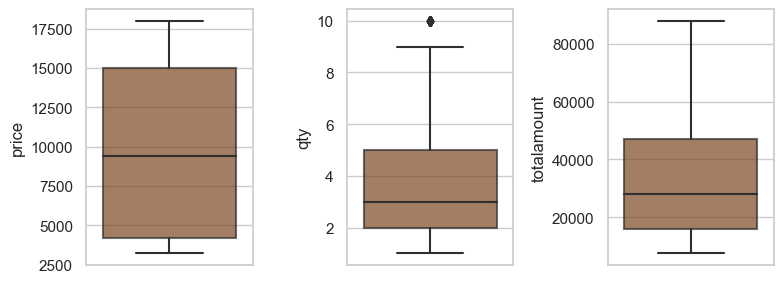

In [26]:
num = ['price','qty','totalamount']

plt.figure(figsize=(8,3))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df_ts[num[i]], orient='v', color="#8B4513", boxprops=dict(alpha=0.7))
    plt.tight_layout()

plt.show()

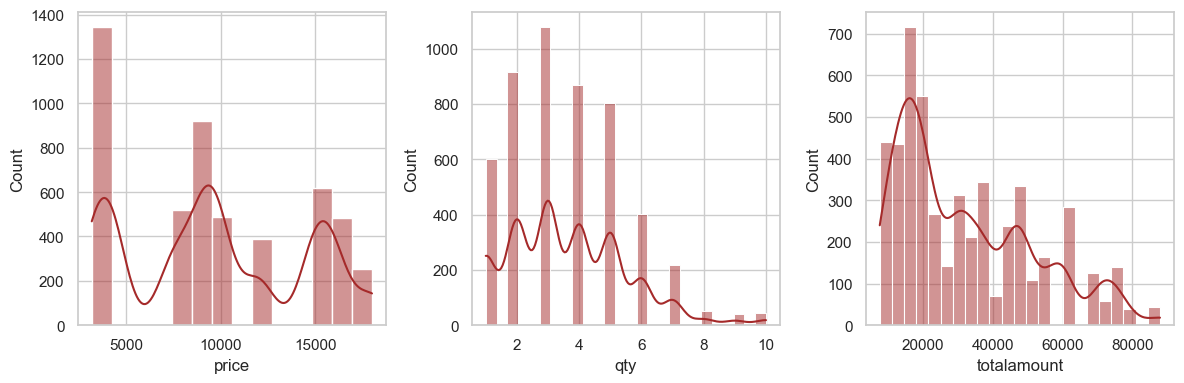

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, ax in enumerate(axes.flat):
    if i < len(num):
        sns.histplot(df_ts[num[i]], kde=True, ax=ax, color='brown')
        #ax.set_title(num[i])
    else:
        ax.axis('off') 
        
plt.tight_layout()
plt.show()

## Creating an Aggregation of Date and Qty

In [28]:
df_ts = df_ts.groupby('date')['qty'].sum()
df_ts.sample(3)

date
2022-11-21    55
2022-08-06    41
2022-11-11    64
Name: qty, dtype: int64

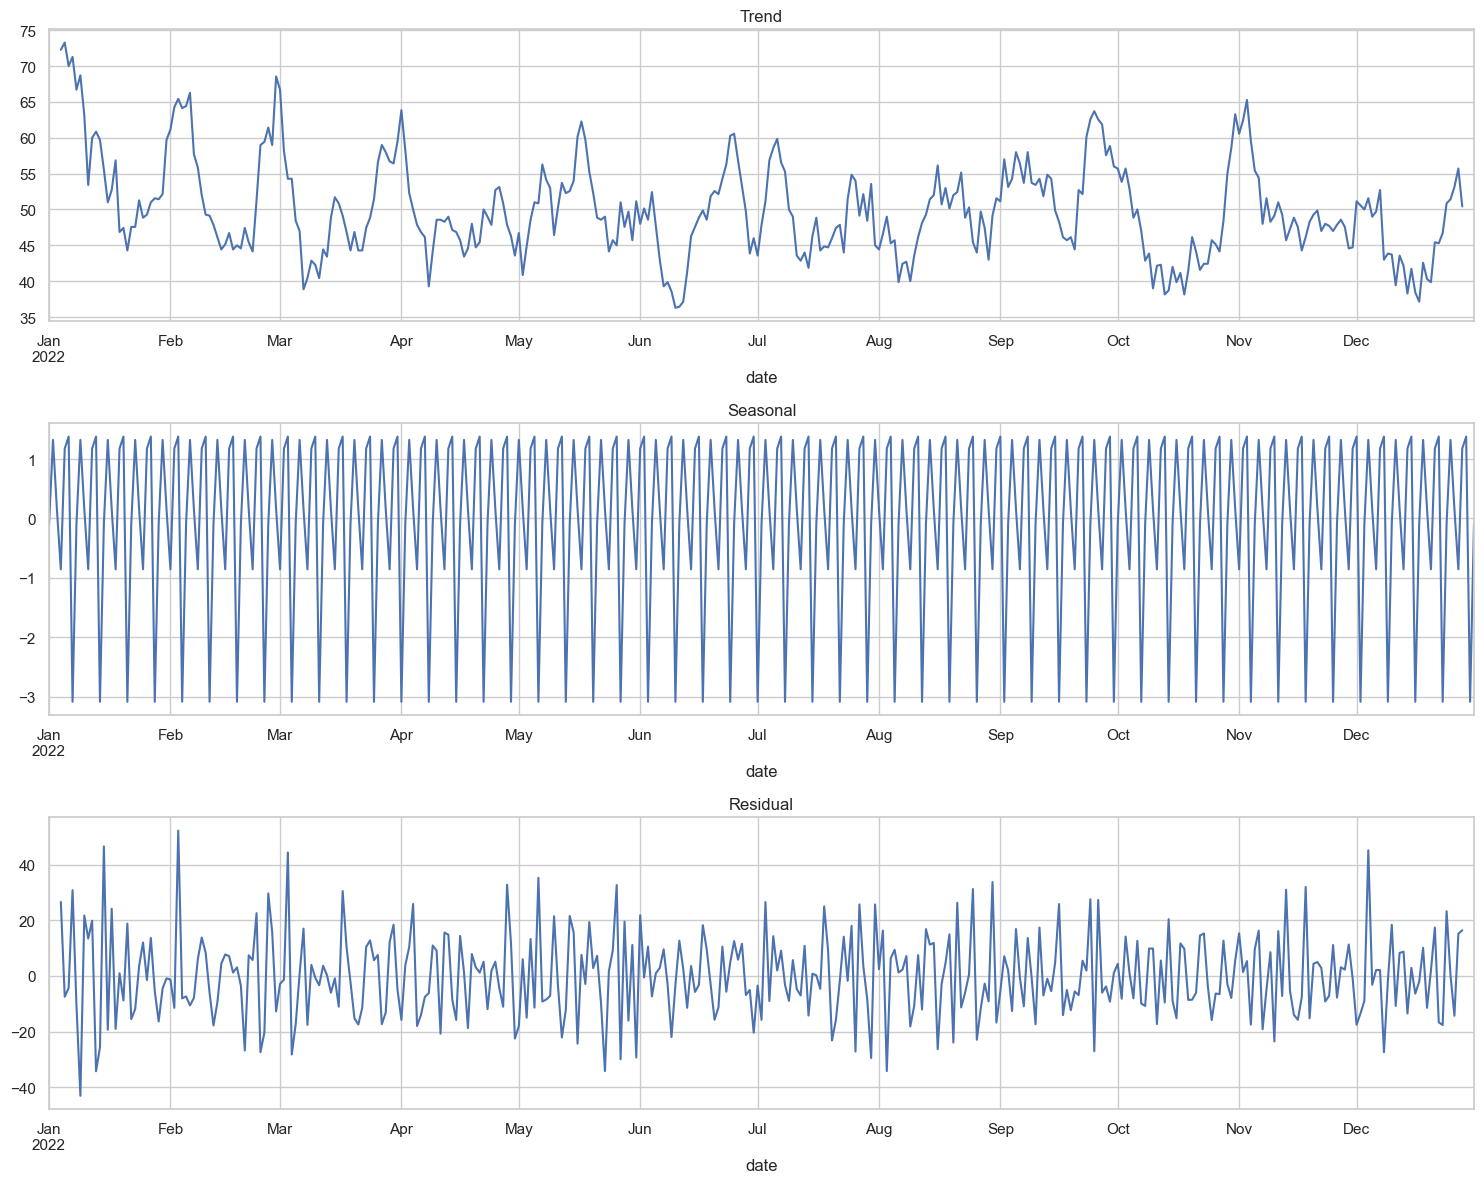

In [29]:
decompose = seasonal_decompose(df_ts)

fig,ax = plt.subplots(3,1,figsize=(15,12))
decompose.trend.plot(ax=ax[0])
ax[0].set_title('Trend')
decompose.seasonal.plot(ax=ax[1])
ax[1].set_title('Seasonal')
decompose.resid.plot(ax=ax[2])
ax[2].set_title('Residual')

plt.tight_layout()
plt.show()

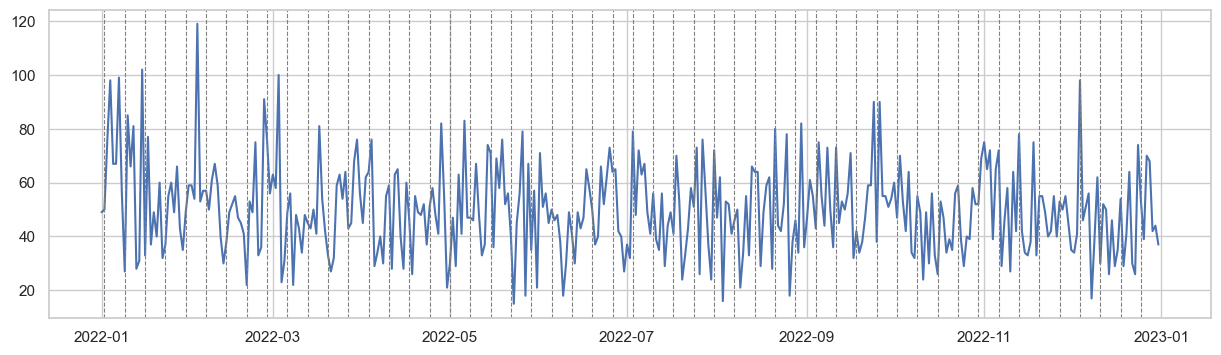

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(df_ts)

reference_dates = df_ts.index[df_ts.index.day_name() == 'Sunday']

for date in reference_dates:
    ax.axvline(date, color='gray', linestyle='--', linewidth=0.8)
    
plt.show()

## Data Transformation

Transforming `qty` feature with Log Transformation due **Right-Skewed** distribution.

In [31]:
#Transform qty to log
df_ts = np.log(df_ts)
df_ts.sample(3)

date
2022-10-21    3.555348
2022-09-29    3.931826
2022-06-03    4.025352
Name: qty, dtype: float64

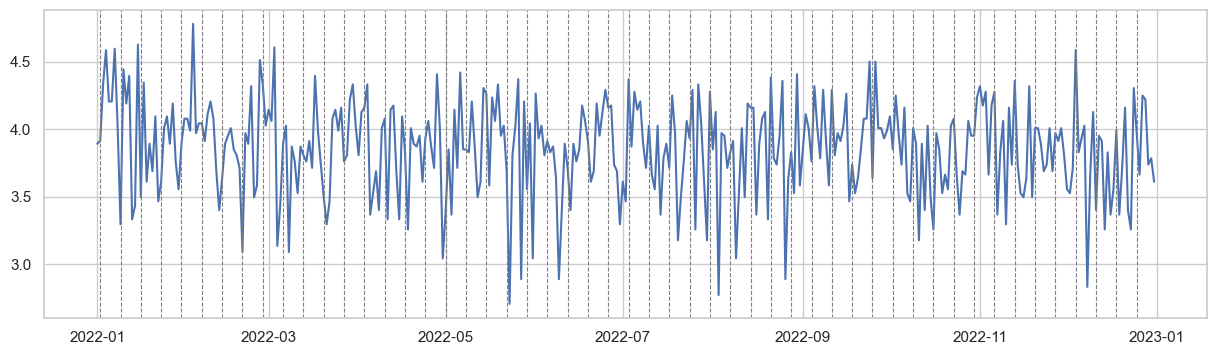

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(df_ts)

reference_dates = df_ts.index[df_ts.index.day_name() == 'Sunday']

for date in reference_dates:
    ax.axvline(date, color='gray', linestyle='--', linewidth=0.8)
    
plt.show()

## Data Splitting

Using last latest month as test set, and the rest are train set

In [36]:
insample_end_date = '2022-11-30'
outsample_start_date = '2022-12-01'

insample_data = df_ts.loc[df_ts.index <= insample_end_date]
outsample_data = df_ts.loc[df_ts.index >= outsample_start_date]

df_train = insample_data
df_test = outsample_data

In [37]:
print('train : ', train_data.shape)
print('test : ', test_data.shape)

train :  (334,)
test :  (31,)


In [38]:
df_test.sample()

date
2022-12-14    3.258097
Name: qty, dtype: float64

## Checking Data Stationary

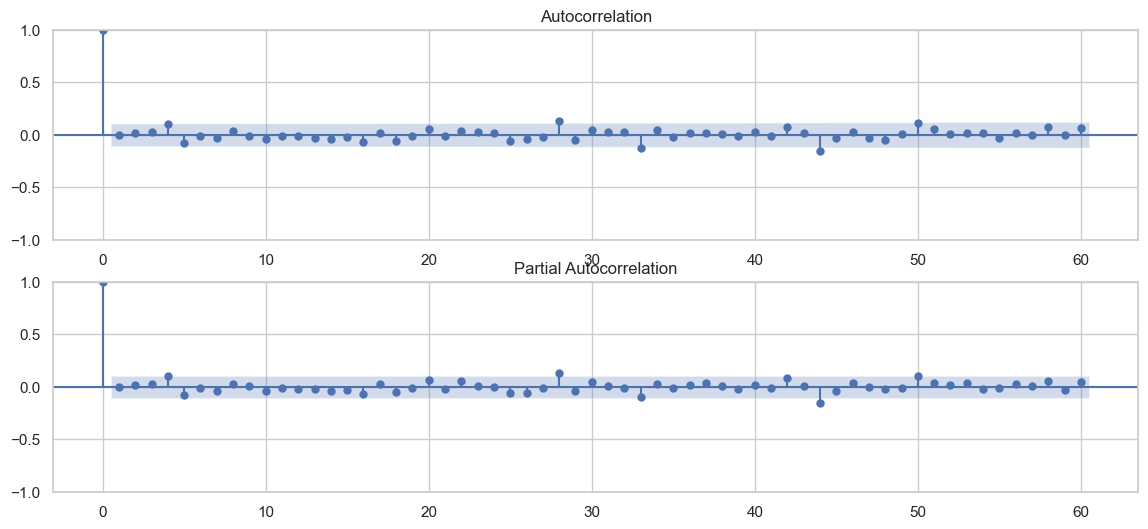

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(train_data, lags=60, ax=ax1)
ax2 = plot_pacf(train_data, lags=60, ax=ax2)
plt.show()

### Augmented Dickey-Fuller test

In [40]:
from statsmodels.tsa.stattools import adfuller

#ADF test
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 2.4374177848749832e-30


> The ACF/PACF and ADF plots show the data is stationary and __can be used for the ARIMA model__.

# ARIMA Modeling
In the Arima model, parameters (p, d, q) are needed to produce accurate estimates.<br>
These parameters can be explained as follows:

- p is the number of autoregressive terms,
- d is the number of nonseasonal differences,
- q is the number of lagged forecast errors in the prediction equation.

Two methods were used to obtain these parameters, namely auto-fit ARIMA and manual parameter tuning

In [41]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [42]:
#auto-fit ARIMA
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [43]:
df_tsr = df_ts.reset_index()

In [44]:
#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_test))
    df_plot = df_tsr[['qty']].iloc[-61:]

    df_plot['forecast'] = [None]*(len(df_plot)-len(forecast_test)) + list(forecast_test)
    
    mae = mean_absolute_error(df_test, forecast_test)
    mape = mean_absolute_percentage_error(df_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_test, forecast_test))
    
    return mae,mape,rmse
    
#Parameter combinations
pval = [50,60,70]
dval = [2]
qval = [1]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(3)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

,param,mae,mape,rsme
2,"(70, 2, 1)",0.306627,0.082065,0.382983
1,"(60, 2, 1)",0.325513,0.086958,0.406125
0,"(50, 2, 1)",0.368325,0.100354,0.435367


In [45]:
#Manual parameter tuning
model = ARIMA(df_train, order=(70, 2, 1))
model_fit = model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


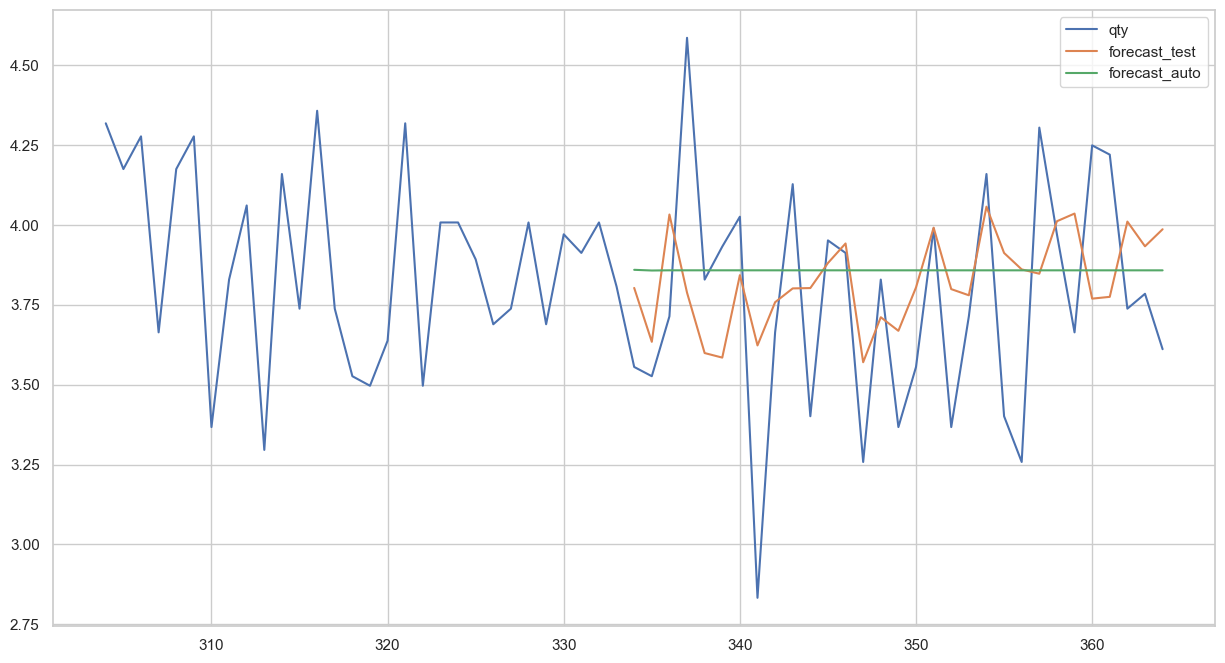

In [46]:
#plot forecasting
forecast_test = model_fit.forecast(len(df_test))
forecast_auto = auto_arima.predict(len(df_test))

df_fct = df_tsr[['qty']].iloc[-61:]

df_fct['forecast_test'] = [None]*(len(df_fct)-len(forecast_test)) + list(forecast_test)
df_fct['forecast_auto'] = [None]*(len(df_fct)-len(forecast_auto)) + list(forecast_auto)

df_fct.plot()
plt.show()

In [47]:
#Manual parameter tuning metrics

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {round(mae,4)}')
print(f'mape - manual: {round(mape,4)}')
print(f'rmse - manual: {round(rmse,4)}')

mae - manual: 0.2976
mape - manual: 0.0814
rmse - manual: 0.3603


In [48]:
#Auto-fit ARIMA metrics

mae = mean_absolute_error(df_test, forecast_auto)
mape = mean_absolute_percentage_error(df_test, forecast_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_auto))

print(f'mae - auto: {round(mae,4)}')
print(f'mape - auto: {round(mape,4)}')
print(f'rmse - auto: {round(rmse,4)}')

mae - auto: 0.3019
mape - auto: 0.0842
rmse - auto: 0.3771


> From metric above, chosen parameters of ARIMA model are `(70, 2, 1)`.

## Predicting Overall Quantity

In [49]:
import statsmodels.api as sm

In [50]:
#Apply model to forecast data
model = ARIMA(df_ts, order=(70, 2, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
#Re-trasnform data
df_ts = np.exp(df_ts)
forecast = np.exp(forecast)

In [ ]:
# ax.axvline(date, color='gray', linestyle='--', linewidth=0.8)

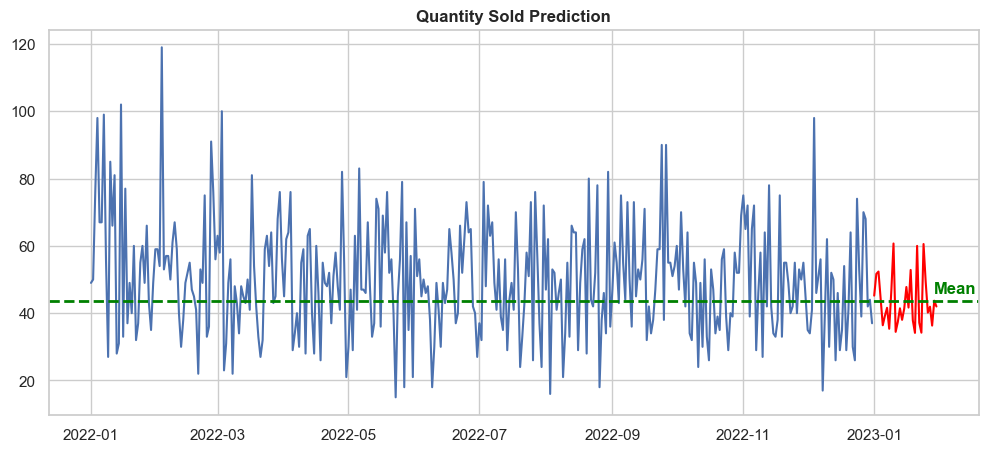

In [108]:
#Plot forecasting
plt.figure(figsize=(12,5))
plt.plot(df_ts)
plt.plot(forecast,color='red')
plt.title('Quantity Sold Prediction', fontweight='bold')

plt.axhline(forecast.mean(), color='green', linestyle='--', linewidth=2)
plt.text(x=19386, y=46, s='Mean', 
         fontsize=12, color='Green', 
         ha='left', fontweight='bold')

plt.show()

In [53]:
forecast.mean()

43.5315099761363

## Predicting Each Product Sold

In [54]:
#Forecast for next 30 days for each product
list_prod = df_prep['product_name'].unique()

dfp = pd.DataFrame({'date':pd.date_range(start='2023-01-01',end='2023-01-30')})
dfp = dfp.set_index('date')
for i in list_prod:
    df_ = df_prep[['date','product_name','qty']]
    df_ = df_[df_['product_name']==i]
    df_= df_.groupby('date')[['qty']].sum()
    df_ = df_.reset_index()

    df_t = pd.DataFrame({'date':pd.date_range(start='2022-01-01',end='2022-12-31')})
    df_t = df_t.merge(df_,how='left',on='date')
    df_t = df_t.fillna(0)
    df_t = df_t.set_index('date')

    model1 = ARIMA(df_t, order=(70, 2, 1))
    model_fit1 = model1.fit()
    forecast1 = model_fit1.forecast(steps=30)
    dfp[i] = forecast1.values
    
dfp.head()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

,Crackers,Oat,Thai Tea,Choco Bar,Coffee Candy,Yoghurt,Ginger Candy,Cheese Stick,Cashew,Potato Chip
date,,,,,,,,,,
2023-01-01,4.803401,2.143732,6.119861,1.529910,4.658392,4.274579,3.735570,8.933782,1.726114,4.434686
2023-01-02,4.651991,3.388049,3.110075,4.104377,3.003262,4.370730,5.031239,1.356234,2.415783,4.233792
2023-01-03,3.733015,2.635371,9.035263,6.242026,5.022520,4.822751,5.119737,3.342458,2.746716,4.324828
2023-01-04,2.280557,2.632456,5.232235,4.628724,4.574758,5.642739,2.044918,8.896478,2.469279,4.824375
2023-01-05,3.869618,1.205513,4.825697,-5.364336,6.893969,3.361703,6.056421,5.679293,1.608104,3.224444


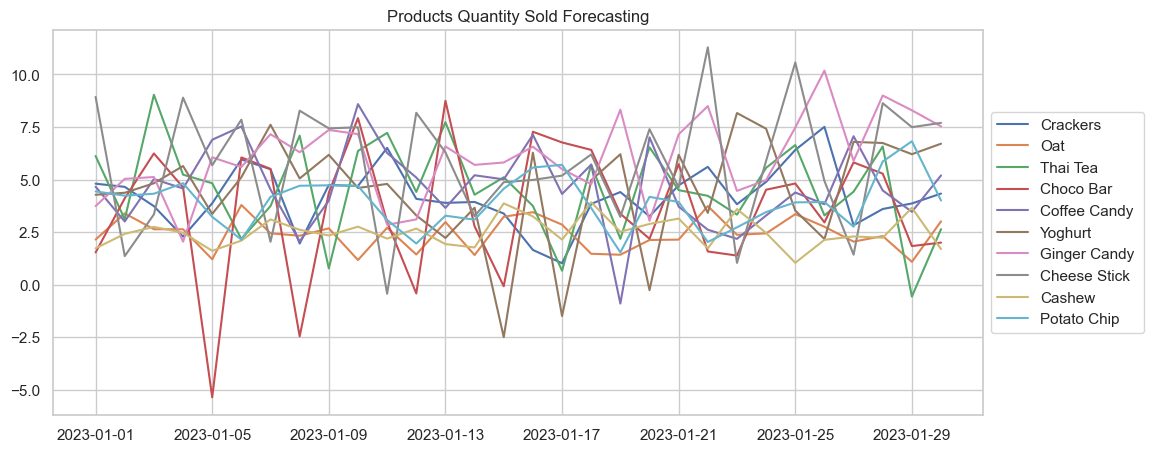

In [55]:
#Plot forecasting
plt.figure(figsize=(12,5))
# plt.plot(df_t)
plt.plot(dfp)
plt.legend(dfp.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Products Quantity Sold Forecasting')
plt.show()

In [56]:
#Products Quantity forecast
round(dfp.describe().T['mean'],0)

Crackers         4.0
Oat              2.0
Thai Tea         5.0
Choco Bar        4.0
Coffee Candy     5.0
Yoghurt          5.0
Ginger Candy     6.0
Cheese Stick     6.0
Cashew           2.0
Potato Chip      4.0
Name: mean, dtype: float64

# Preprocessing for Clustering

In [57]:
df_cluster = df_prep.groupby('customerid').agg({'transactionid':'count','qty':'sum','totalamount':'sum'})
df_cluster

,transactionid,qty,totalamount
customerid,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


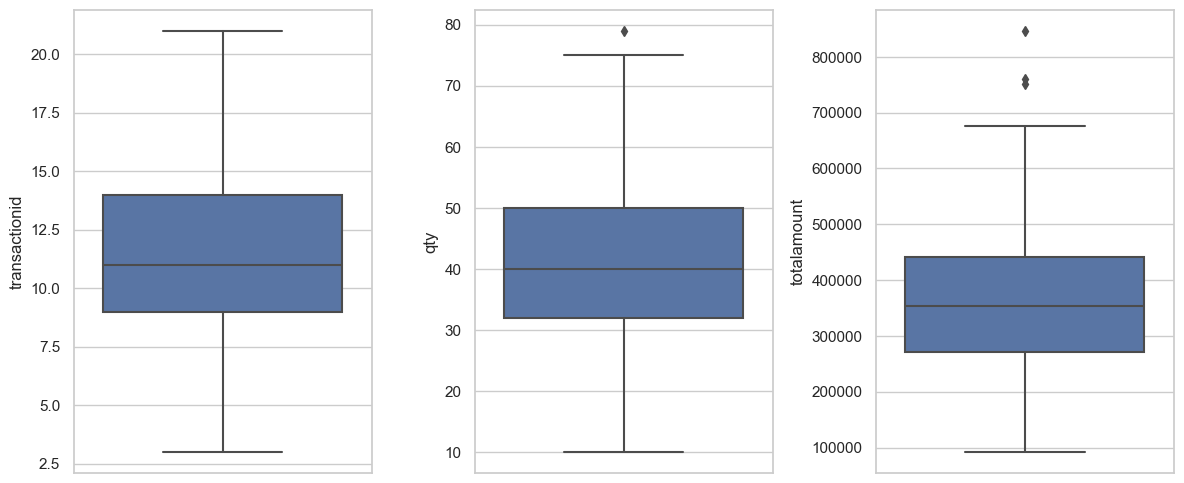

In [58]:
#Check outliers on new dataset
features = df_cluster.columns
fig, ax = plt.subplots(1,len(df_cluster.columns),figsize=(12,5))
for i in range(0,len(df_cluster.columns)):
    sns.boxplot(data=df_cluster,y=features[i],ax=ax[i])
plt.tight_layout()
plt.show()

In [60]:
#Standarisasi dataset baru
from sklearn.preprocessing import StandardScaler

X = df_cluster.values
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data=X_std,columns=df_cluster.columns)
df_std.isna().sum()

transactionid    0
qty              0
totalamount      0
dtype: int64

# Clustering Modeling

## Elbow Method

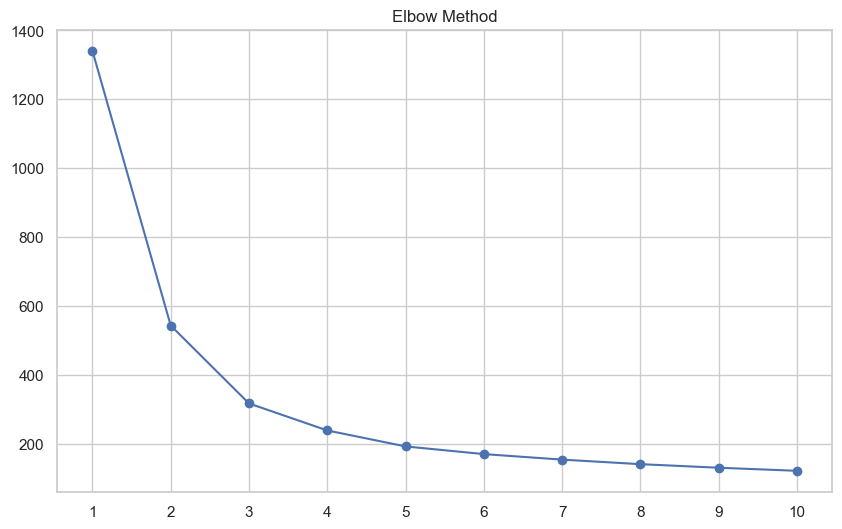

In [62]:
from sklearn.cluster import KMeans

#Elbow method
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df_std.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.xticks(list(range(1,11)))
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method')
plt.show()

> According to the elbow method above, we decided to choose `n_clusters=3` as the number of clusters

In [110]:
# Kmeans n_cluster = 3
#Clustering Kmeans
kmeans_3 = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans_3.fit(X_std)

#Tambah clusters label pada dataset
df_cl3 = pd.DataFrame(data=X_std,columns=df_cluster.columns)
df_cl3['cluster'] = kmeans_3.labels_
df_cl3.sample(3)

,transactionid,qty,totalamount,cluster
283,-0.379565,0.476311,0.182238,2
18,1.162850,1.731962,1.703587,1
357,0.237401,-0.386948,0.406344,2


<Figure size 400x400 with 0 Axes>

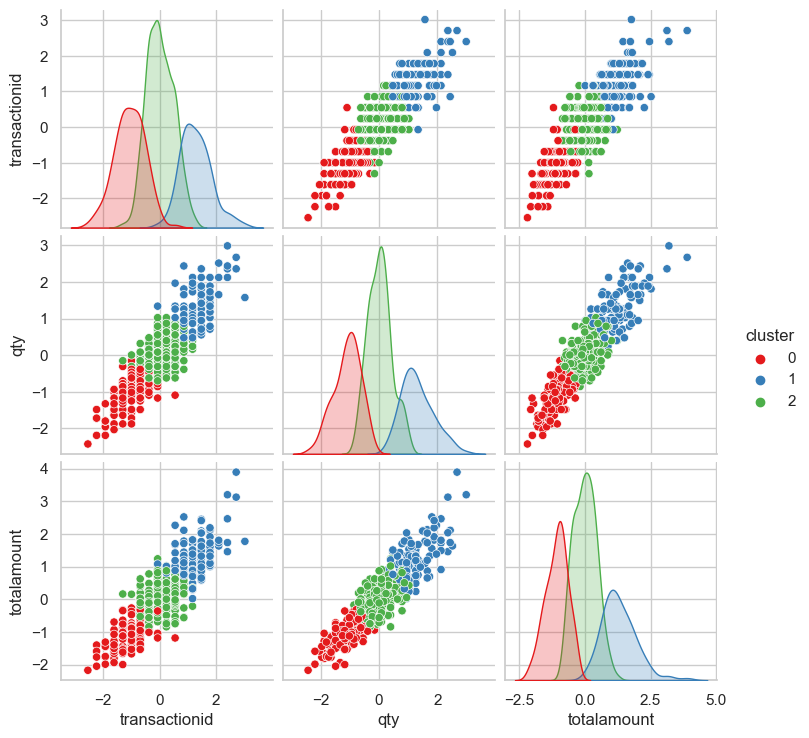

In [111]:
#PLot Before PCA
plt.figure(figsize=(4,4))
sns.pairplot(data=df_cl3,hue='cluster',palette='Set1')
plt.show()

The plots above show that data were __well-clustered__

## Principal Component Analysis (PCA)

In [114]:
#PCA
from sklearn.decomposition import PCA

pcs_3 = PCA(n_components=2).fit_transform(X_std)
pdf_3 = pd.DataFrame(data=pcs_3,columns=['pc1','pc2'])
pdf_3['cluster'] = df_cl3['cluster']
pdf_3.describe().T

,count,mean,std,min,25%,50%,75%,max
pc1,447.0,-1.589581e-17,1.661646,-4.120551,-1.132975,-0.123870,1.081022,5.351262
pc2,447.0,-1.192186e-17,0.386276,-1.279946,-0.242372,-0.003848,0.246496,1.348982
cluster,447.0,1.149888e+00,0.856206,0.000000,0.000000,1.000000,2.000000,2.000000


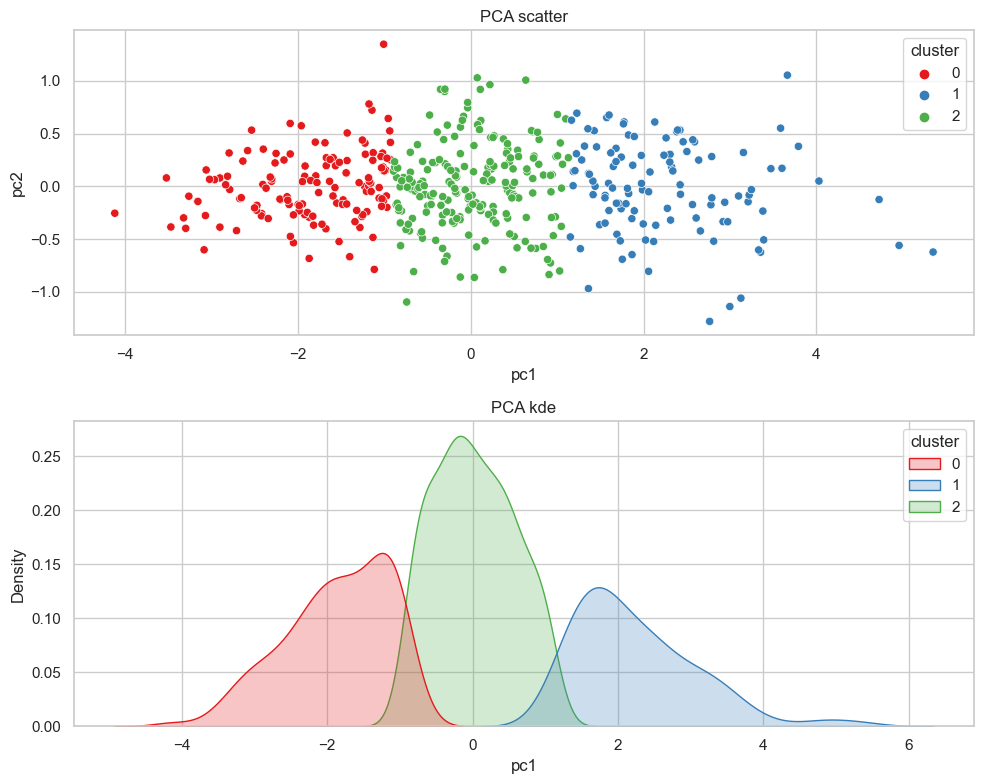

In [115]:
#PCA plot
fig,ax = plt.subplots(2,1,figsize=(10,8))
# plt.figure(figsize=(10,5))
sns.scatterplot(data=pdf_3,x='pc1',y='pc2',hue='cluster',palette='Set1',ax=ax[0])
ax[0].set_title('PCA scatter')
sns.kdeplot(data=pdf_3,x='pc1',hue='cluster',palette='Set1',fill=True,ax=ax[1])
ax[1].set_title('PCA kde')
plt.tight_layout()
plt.show()

## Silhouette Analysis

In [117]:
from sklearn.metrics import silhouette_samples, silhouette_score

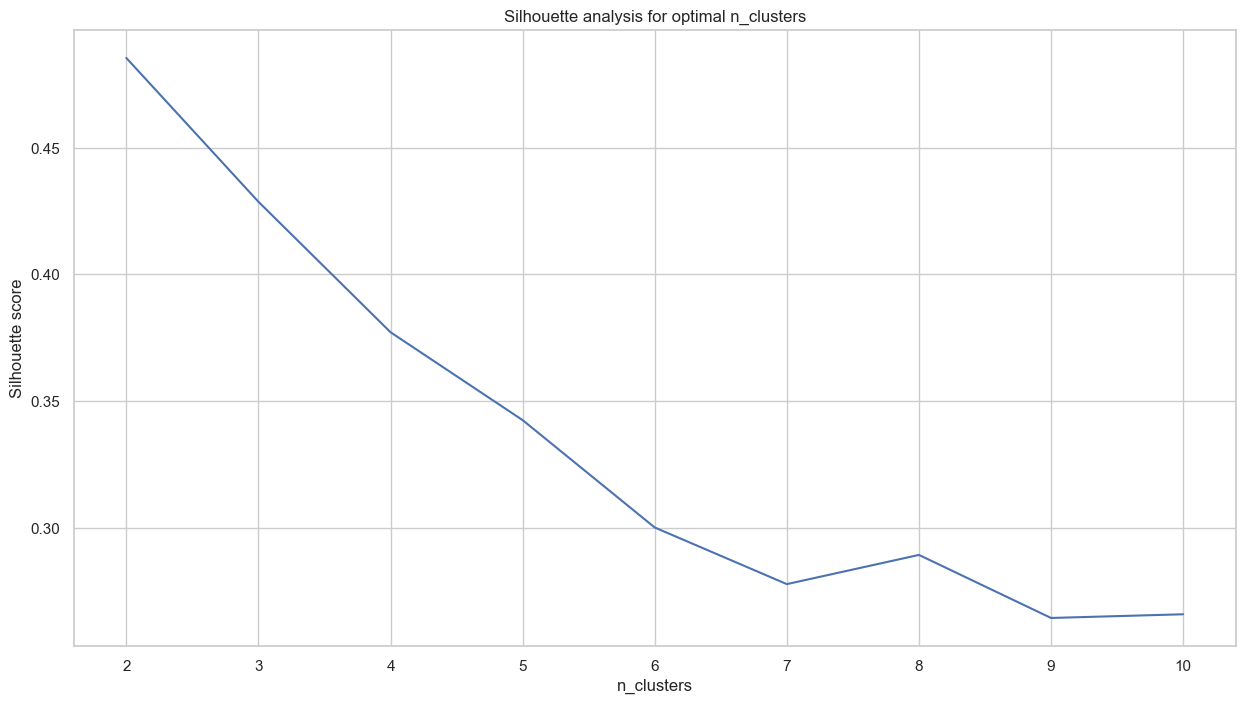

In [118]:
n_clust = list(range(2,11))
silhouette_avg = []
for i in n_clust:
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    
    labels = kmeans.fit_predict(X_std)
    silhouette_avg.append(silhouette_score(X_std,labels))
    
plt.plot(n_clust,silhouette_avg)
plt.xlabel('n_clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for optimal n_clusters')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.48530485981509097
For n_clusters = 3 The average silhouette_score is : 0.4286478086768933
For n_clusters = 4 The average silhouette_score is : 0.3772419295085858
For n_clusters = 5 The average silhouette_score is : 0.34260947001461384
For n_clusters = 6 The average silhouette_score is : 0.30030062675665914


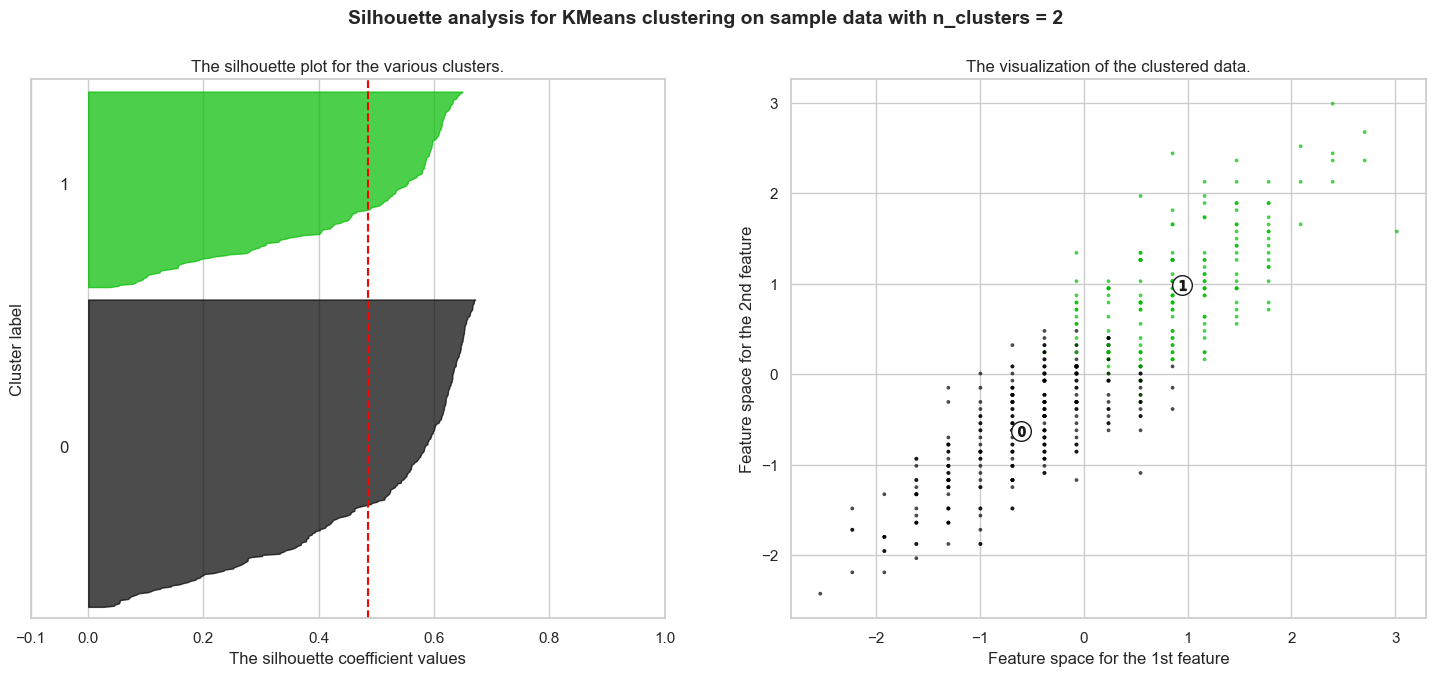

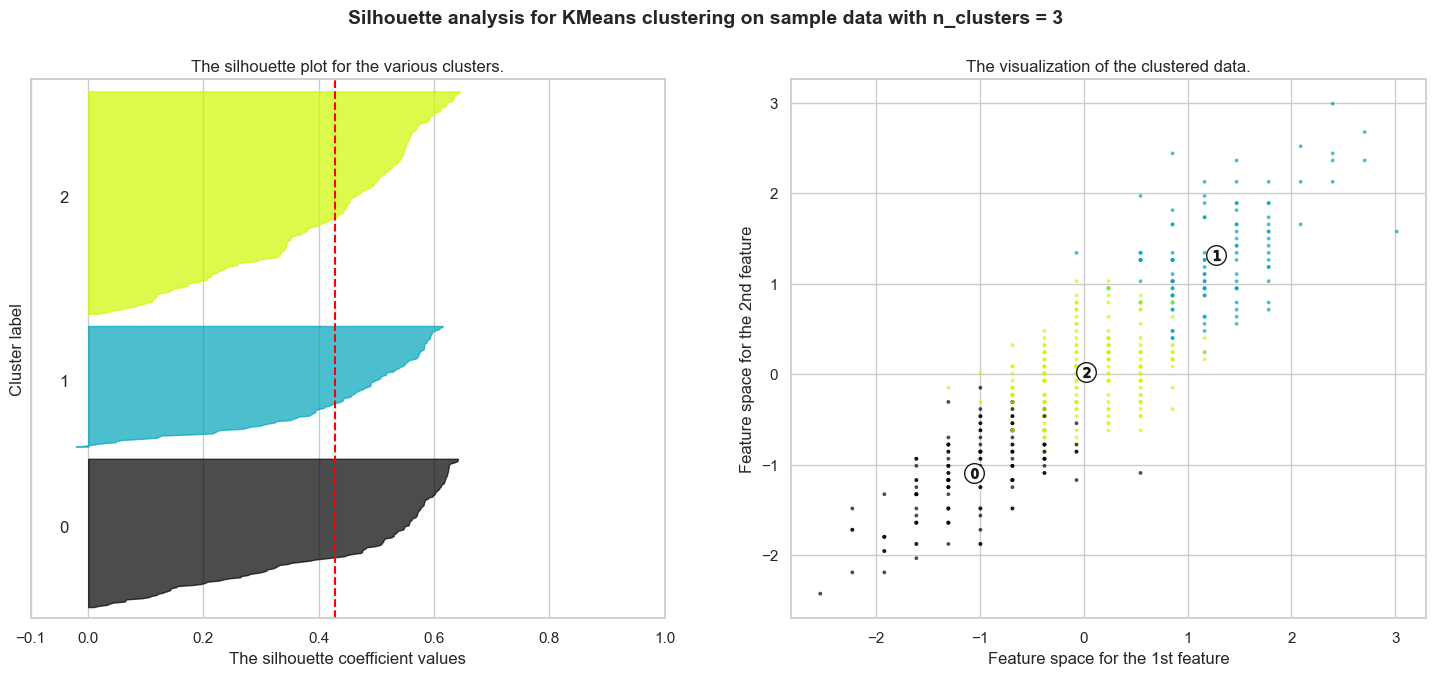

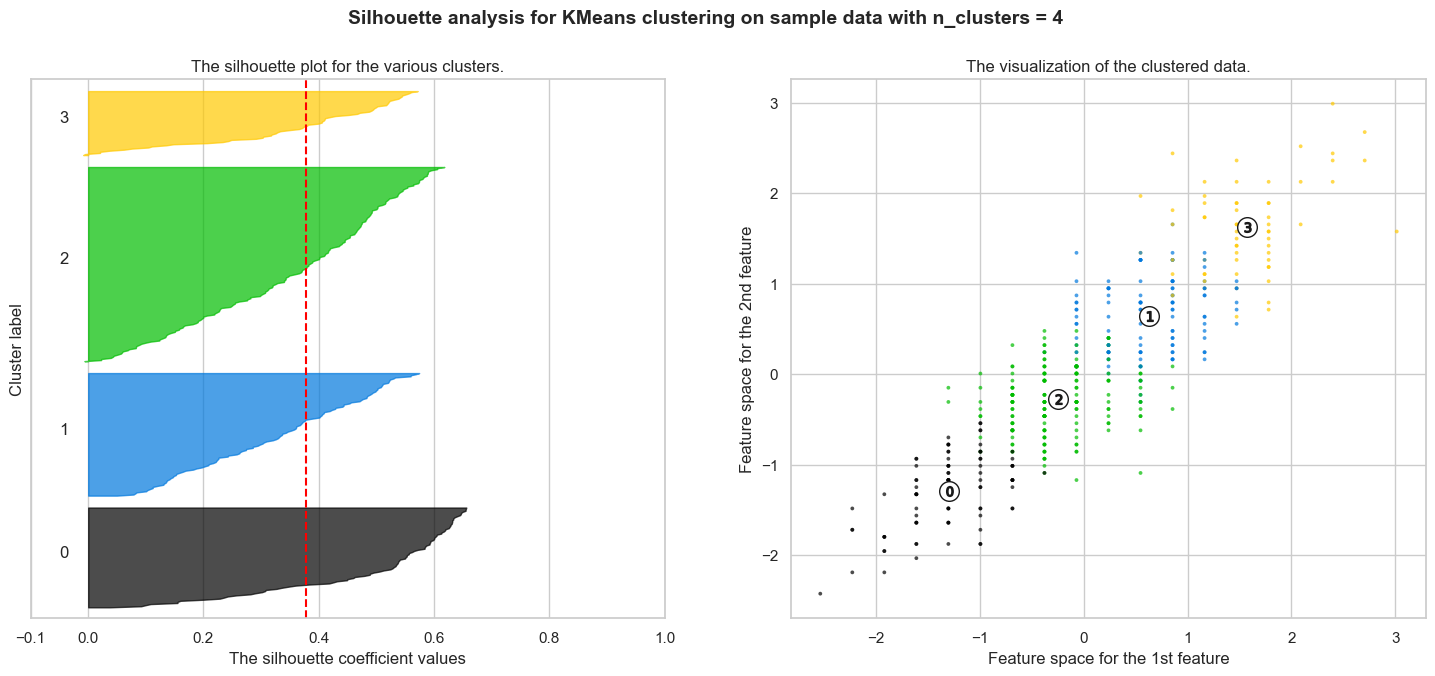

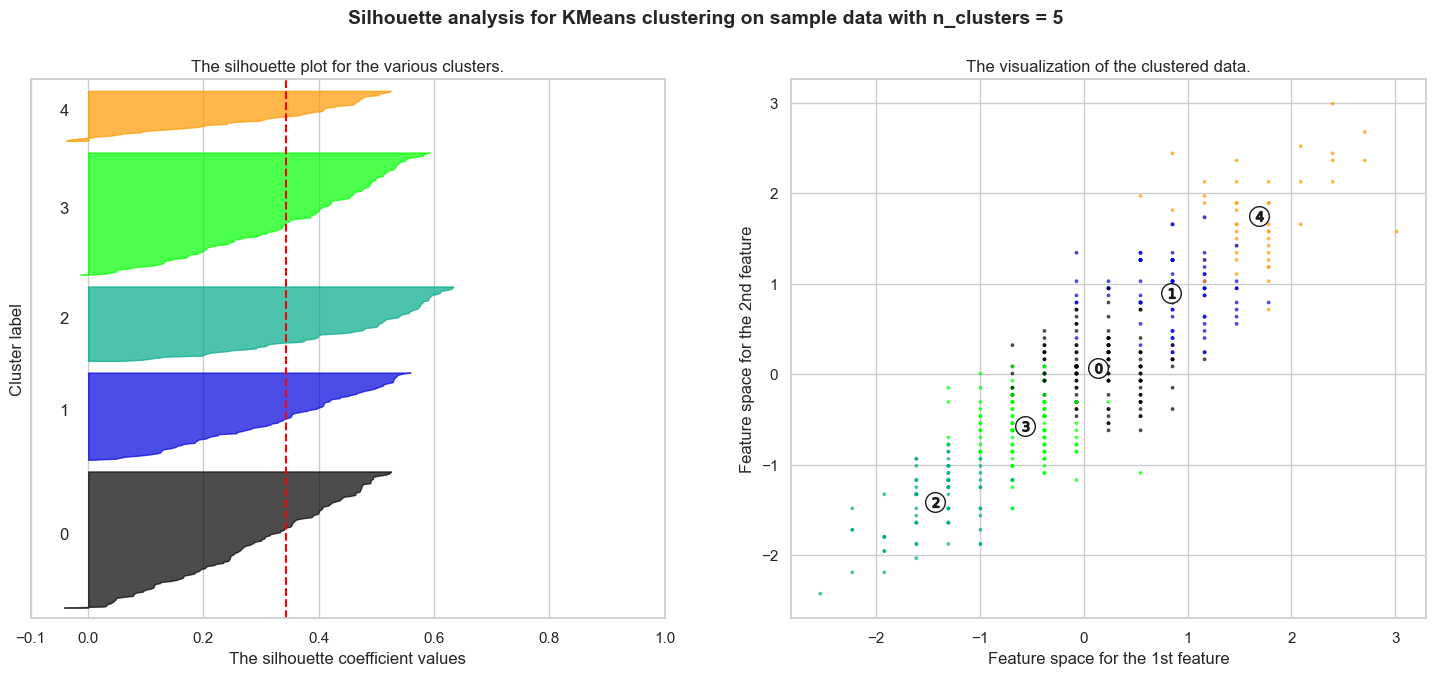

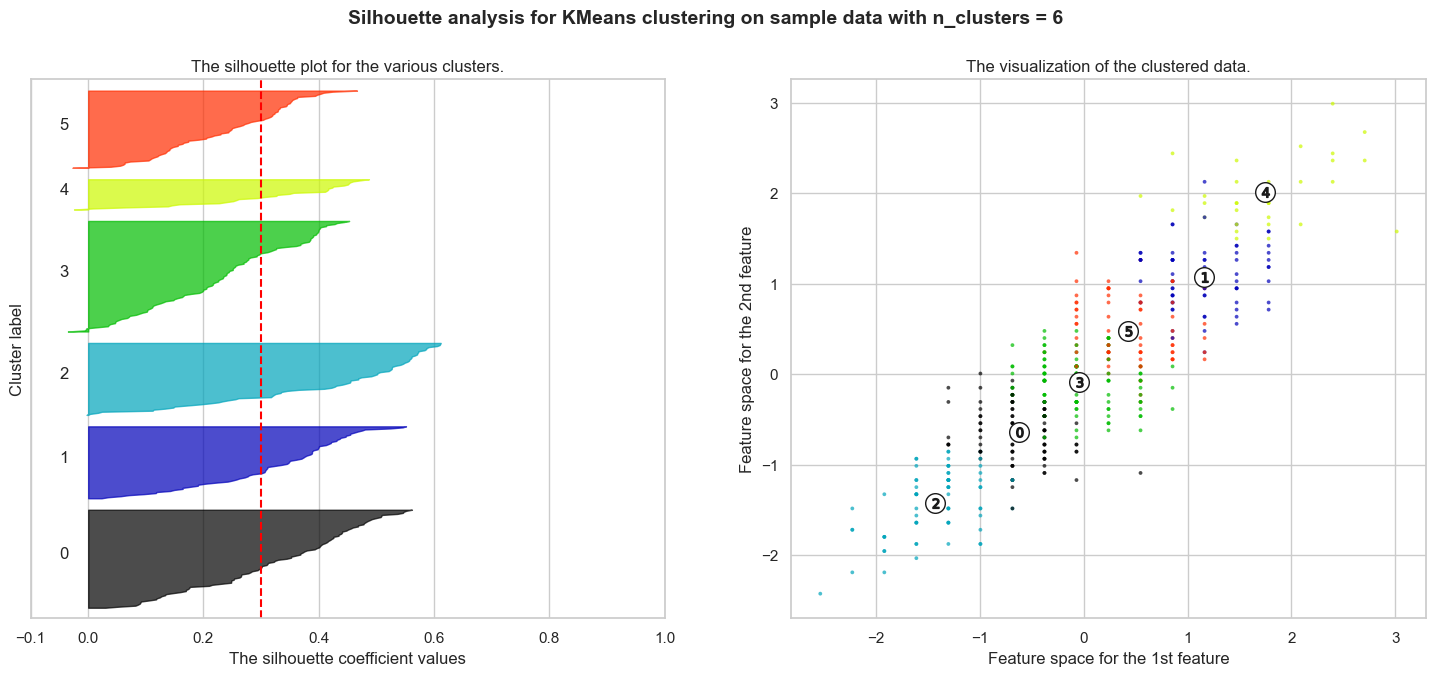

In [122]:
range_n_clusters = [2,3, 4, 5,6]
X = X_std
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++',max_iter=300,n_init=10,random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

By silhouette analysis above, `n_cluster = 3` is fairly well divided with silhoette coefficient is __0.429__

## Cluster Interpretation with RFM (Recency, Frequency, Monetary) Analysis

In [124]:
df_cluster['cluster'] = kmeans_3.labels_

df_prep['recency'] = (pd.to_datetime('2023-01-01') - df_['date']).dt.days.astype('int')
df_r = df_prep.groupby('customerid').agg({'recency':'min'})

df_rfm = df_cluster.copy()
df_rfm['recency'] = df_r['recency']

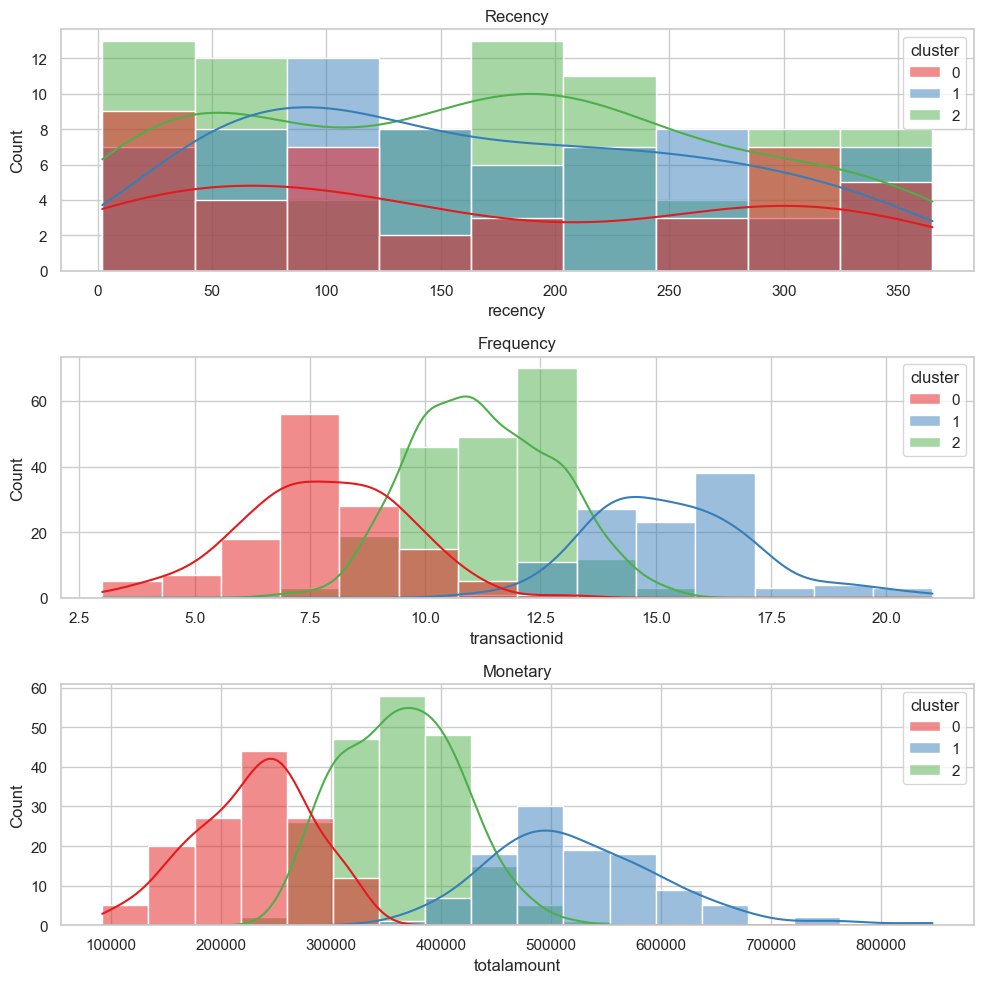

In [125]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
sns.histplot(data=df_rfm,x='recency',hue='cluster',palette='Set1',ax=ax[0],kde=True)
ax[0].set_title('Recency')
sns.histplot(data=df_rfm,x='transactionid',hue='cluster',palette='Set1',ax=ax[1],kde=True)
ax[1].set_title('Frequency')
sns.histplot(data=df_rfm,x='totalamount',hue='cluster',palette='Set1',ax=ax[2],kde=True)
ax[2].set_title('Monetary')

plt.tight_layout()
plt.show()

## Cluster Observations

**Cluster 0 (New Customer):**
- Mostly having higher recency
- Have Lowest Frequency and Monetary
- Strategies Recommendations :
    - Provide support
    - Gift discount
    - Build Relationship
    
**Cluster 1 (Potential Loyalist):**
- Have medium recency
- Have Highest Frequency and Monetary
- Strategies Recommendations :
    - Offer loyalty program
    - Run contest
    - Make them feel special

**Cluster 2 (Loyal Customer):**
- Have Highest low recency
- Have Medium Frequency and Monetary
- Strategies Recommendations :
    - Take feedback and surveys
    - Upsell product
    - Present bonus